In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loding the dataSet
data = pd.read_csv("DataSet\mumbai.csv")

In [3]:
data.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,Unfurnished,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101


In [4]:
data.shape

(6255, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   Address           6255 non-null   object 
 2   area              6255 non-null   float64
 3   latitude          6255 non-null   float64
 4   longitude         6255 non-null   float64
 5   Bedrooms          6255 non-null   float64
 6   Bathrooms         6255 non-null   float64
 7   Balcony           2376 non-null   float64
 8   Status            5774 non-null   object 
 9   neworold          6255 non-null   object 
 10  parking           2129 non-null   float64
 11  Furnished_status  3600 non-null   object 
 12  Lift              1678 non-null   float64
 13  Landmarks         2617 non-null   object 
 14  type_of_building  6255 non-null   object 
 15  desc              6255 non-null   object 
 16  Price_sqft        6255 non-null   float64


In [6]:
for column in data.columns:
  print(data[column].value_counts())
  print("_"*30)

price
15000000.0    183
25000000.0    165
20000000.0    157
18000000.0    157
16000000.0    135
             ... 
24800000.0      1
21300000.0      1
71500000.0      1
9450000.0       1
3880000.0       1
Name: count, Length: 540, dtype: int64
______________________________
Address
Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                                 154
Andheri West, Mumbai - Western Suburbs, Maharashtra                                                                   129
Andheri East, Mumbai - Western Suburbs, Maharashtra                                                                    81
Chembur, Mumbai - Harbour Line, Maharashtra                                                                            79
Mulund West, Mumbai - Central Line, Maharashtra                                                                        78
                                                                                                            

In [7]:
data.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             3879
Status               481
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
Landmarks           3638
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [8]:
data.drop(columns=['Landmarks', 'Lift','Furnished_status','parking','Balcony'], inplace=True)

In [9]:
data['Status'].value_counts()

Status
Ready to Move         5771
Under Construction       3
Name: count, dtype: int64

In [10]:
data["Status"] = data["Status"].fillna("Under Construction")

In [11]:
data.isna().sum()

price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Status              0
neworold            0
type_of_building    0
desc                0
Price_sqft          0
dtype: int64

# Feature Selection

In [12]:
originalFeatures = data.columns

In [13]:
print("Original Features count: ", len(originalFeatures))
print("Original Features: ", originalFeatures)
data.head()

Original Features count:  12
Original Features:  Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Status', 'neworold', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')


,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,Under Construction,New Property,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,Under Construction,New Property,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,Under Construction,New Property,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,Ready to Move,New Property,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,Under Construction,New Property,Flat,\n \n \n...,12385.321101


Text(0.5, 1.0, 'longitude and latitude')

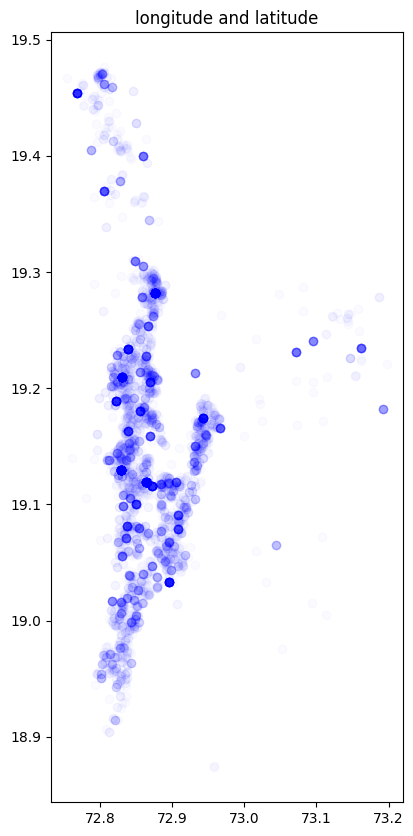

In [14]:
#First, lets check out the longitude and latitude columns.
alpha = 0.02
plt.figure(figsize=(10,10))
# Ioc_x and Loc_y
plt.subplot (121)
plt.scatter(data.longitude, data.latitude, color='blue',alpha=alpha)
plt.title("longitude and latitude")

In [15]:
data.drop(columns=['longitude', 'latitude'], inplace=True)

Text(0.5, 1.0, 'Bedrooms and Bathrooms')

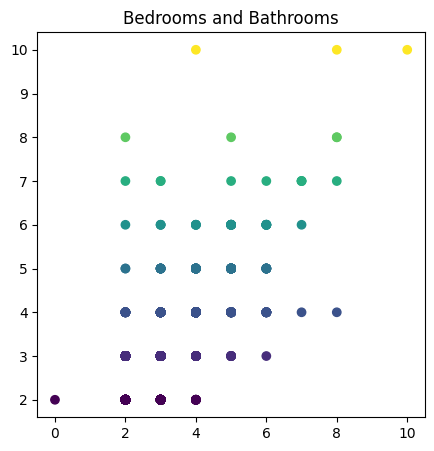

In [16]:
plt.figure(figsize=(5,5))

plt.scatter(data.Bathrooms, data.Bedrooms, c=data.Bedrooms, cmap='viridis')
plt.title("Bedrooms and Bathrooms")

In [17]:
data['bhk'] = data['area'] / 500

Text(0.5, 1.0, 'BHK and Price')

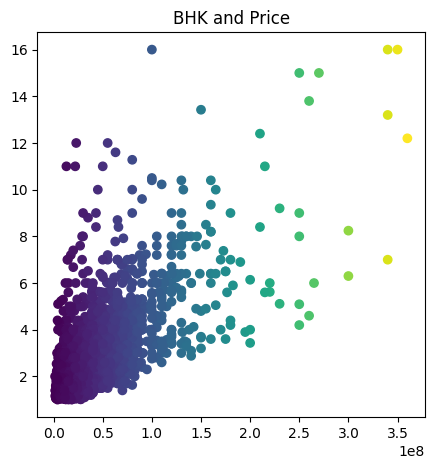

In [18]:
plt.figure(figsize=(5,5))

plt.scatter(data.price, data.bhk, c=data.price, cmap='viridis')
plt.title("BHK and Price")

Text(0.5, 1.0, 'Area and Price')

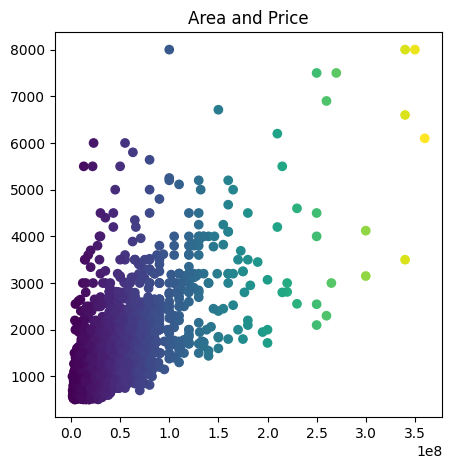

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(data.price, data.area, c=data.price, cmap='viridis')
plt.title("Area and Price")

In [20]:
data['desc']

0       \n\n\n                                Right fr...
1       \n\n\n                                Right fr...
2       \n                    \n                    \n...
3       \n\n\n                                Welcome ...
4       \n                    \n                    \n...
                              ...                        
6250    \n\n\n                                 This Mu...
6251    \n                    \n                    \n...
6252    \n\n\n                                 This Fr...
6253                                                   \n
6254                                                   \n
Name: desc, Length: 6255, dtype: object

In [21]:
data.drop(columns=['desc'], inplace=True)

In [22]:
data.head()

,price,Address,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,Price_sqft,bhk
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,Under Construction,New Property,Flat,35612.082671,1.258
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,Under Construction,New Property,Flat,35934.291581,1.948
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,Under Construction,New Property,Flat,32747.933884,1.936
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,2.0,2.0,Ready to Move,New Property,Flat,29729.729730,1.258
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,2.0,2.0,Under Construction,New Property,Flat,12385.321101,2.180


In [23]:
data['Address'].value_counts()

Address
Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                                 154
Andheri West, Mumbai - Western Suburbs, Maharashtra                                                                   129
Andheri East, Mumbai - Western Suburbs, Maharashtra                                                                    81
Chembur, Mumbai - Harbour Line, Maharashtra                                                                            79
Mulund West, Mumbai - Central Line, Maharashtra                                                                        78
                                                                                                                     ... 
Mumbai, Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                           1
74, Sarayu, Narayan Guru hsg soc ltd. P.L.lokhande marg, Chembur, Mumbai - Harbour Line, Maharashtra                    1
120/46, Anandvan

In [24]:
data['Address'] = data['Address'].apply(lambda x: x.strip())
location_count = data['Address'].value_counts()

In [25]:
location_count

Address
Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                                 154
Andheri West, Mumbai - Western Suburbs, Maharashtra                                                                   129
Andheri East, Mumbai - Western Suburbs, Maharashtra                                                                    81
Chembur, Mumbai - Harbour Line, Maharashtra                                                                            79
Mulund West, Mumbai - Central Line, Maharashtra                                                                        78
                                                                                                                     ... 
Mumbai, Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                           1
74, Sarayu, Narayan Guru hsg soc ltd. P.L.lokhande marg, Chembur, Mumbai - Harbour Line, Maharashtra                    1
120/46, Anandvan

In [26]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Address
Virar East, Mumbai - Mira Road and Beyond, Maharashtra                                                                10
Dadar West, Mumbai - South Mumbai, Maharashtra                                                                        10
Chembur East, Mumbai, Maharashtra                                                                                     10
Dadar East, Mumbai - Central Mumbai, Maharashtra                                                                      10
Wadala, Mumbai - Harbour Line, Maharashtra                                                                            10
                                                                                                                      ..
Mumbai, Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                                                          1
74, Sarayu, Narayan Guru hsg soc ltd. P.L.lokhande marg, Chembur, Mumbai - Harbour Line, Maharashtra                   1
120/46, Anandvan, Sector

In [27]:
data['Address']= data['Address'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [28]:
data['Address'].value_counts()

Address
other                                                                          4343
Mira Road, Mumbai - Mira Road and Beyond, Maharashtra                           154
Andheri West, Mumbai - Western Suburbs, Maharashtra                             129
Andheri East, Mumbai - Western Suburbs, Maharashtra                              81
Chembur, Mumbai - Harbour Line, Maharashtra                                      79
Mulund West, Mumbai - Central Line, Maharashtra                                  78
Kandivali West, Mumbai - North Mumbai, Maharashtra                               70
Malad West, Mumbai - Western Suburbs, Maharashtra                                69
Borivali West, Mumbai - Western Suburbs, Maharashtra                             64
Virar West, Mumbai - Mira Road and Beyond, Maharashtra                           60
Kandivali East, Mumbai - North Mumbai, Maharashtra                               52
Goregaon West, Mumbai - North Mumbai, Maharashtra                   

In [29]:
data

,price,Address,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,Price_sqft,bhk
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,Under Construction,New Property,Flat,35612.082671,1.258
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,Under Construction,New Property,Flat,35934.291581,1.948
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,Under Construction,New Property,Flat,32747.933884,1.936
3,18700000.0,other,629.0,2.0,2.0,Ready to Move,New Property,Flat,29729.729730,1.258
4,13500000.0,other,1090.0,2.0,2.0,Under Construction,New Property,Flat,12385.321101,2.180
...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,other,810.0,2.0,2.0,Ready to Move,Resale,Flat,24074.074074,1.620
6251,22000000.0,other,1400.0,3.0,3.0,Ready to Move,Resale,Flat,15714.285714,2.800
6252,20000000.0,other,750.0,2.0,2.0,Ready to Move,Resale,Flat,26666.666667,1.500
6253,11000000.0,"Sion, Mumbai - Central Mumbai, Maharashtra",700.0,2.0,2.0,Ready to Move,Resale,Flat,15714.285714,1.400


In [30]:
data['type_of_building'].describe()

count     6255
unique       2
top       Flat
freq      5828
Name: type_of_building, dtype: object

In [31]:
data['type_of_building'].value_counts()

type_of_building
Flat                5828
Individual House     427
Name: count, dtype: int64

In [32]:
data['type_of_building'] = data['type_of_building'].replace('Individual House', 'Bungalow')

In [33]:
def round_up_if_gt_0_5(x):
  return int(x + (x % 1 > 0.5))

In [34]:
data['bhk'] = data['bhk'].apply(round_up_if_gt_0_5)

In [35]:
data.describe()

,price,area,Bedrooms,Bathrooms,Price_sqft,bhk
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,2.452278,2.425580,21422.923601,2.352678
std,2.788831e+07,636.973259,0.749534,0.762604,12698.478665,1.303484
min,1.500000e+06,503.000000,2.000000,0.000000,1500.000000,1.000000
25%,1.300000e+07,846.500000,2.000000,2.000000,13709.934735,2.000000
50%,1.900000e+07,1000.000000,2.000000,2.000000,19285.714286,2.000000
75%,3.000000e+07,1300.000000,3.000000,3.000000,26500.000000,3.000000
max,3.600000e+08,8000.000000,10.000000,10.000000,119047.619048,16.000000


In [36]:
data['price'].describe()

count    6.255000e+03
mean     2.684187e+07
std      2.788831e+07
min      1.500000e+06
25%      1.300000e+07
50%      1.900000e+07
75%      3.000000e+07
max      3.600000e+08
Name: price, dtype: float64

In [37]:
data['price'] = data['price'] / 100000

In [38]:
data['price'].describe()

count    6255.000000
mean      268.418737
std       278.883107
min        15.000000
25%       130.000000
50%       190.000000
75%       300.000000
max      3600.000000
Name: price, dtype: float64

# Cleaned Data

In [39]:
data.head()

,price,Address,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,Price_sqft,bhk
0,224.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,Under Construction,New Property,Flat,35612.082671,1
1,350.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,Under Construction,New Property,Flat,35934.291581,2
2,317.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,Under Construction,New Property,Flat,32747.933884,2
3,187.0,other,629.0,2.0,2.0,Ready to Move,New Property,Flat,29729.729730,1
4,135.0,other,1090.0,2.0,2.0,Under Construction,New Property,Flat,12385.321101,2


In [40]:
data.to_csv("./DataSet/Cleaned_data(1).csv")

In [41]:
X = data.drop(columns=['price'])
Y = data['price']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape)

(5004, 9)
(1251, 9)


# Applying Linear Regression

In [45]:
column_trans = make_column_transformer((OneHotEncoder(), ['Address', 'Status', 'neworold', 'type_of_building']), remainder='passthrough')

In [46]:
scalar  = StandardScaler(with_mean=False)

In [47]:
lr = LinearRegression()

In [48]:
pipe = make_pipeline(column_trans,scalar,lr)

In [49]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Address', 'Status',
                                                   'neworold',
                                                   'type_of_building'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [50]:
Y_pred_lr = pipe.predict(X_test)

In [51]:
r2_score(Y_test,Y_pred_lr)

0.8566564466170041

# Applying Lasso Regression

In [52]:
lasso = Lasso()

In [53]:
pipe = make_pipeline(column_trans,scalar,lasso)

In [54]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Address', 'Status',
                                                   'neworold',
                                                   'type_of_building'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [55]:
Y_pred_lasso = pipe.predict(X_test)

In [56]:
r2_score(Y_test,Y_pred_lasso)

0.8563594554710221

# Applying Ridge Regression

In [57]:
ridge = Ridge()

In [58]:
pipe = make_pipeline(column_trans, scalar,ridge)

In [59]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Address', 'Status',
                                                   'neworold',
                                                   'type_of_building'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [60]:
Y_pred_ridge = pipe.predict(X_test)

In [61]:
r2_score(Y_test,Y_pred_ridge)

0.85662737834643

# Comparing All Algo

In [62]:
print("Linear Regression: ", r2_score(Y_test,Y_pred_lr))
print("Lasso Regression: ", r2_score(Y_test, Y_pred_lasso))
print("Ridge Regression: ", r2_score(Y_test, Y_pred_ridge))

Linear Regression:  0.8566564466170041
Lasso Regression:  0.8563594554710221
Ridge Regression:  0.85662737834643


In [63]:
import pickle

In [64]:
pickle.dump(pipe,open("Model(1).pkl",'wb'))